<a href="https://colab.research.google.com/github/imddash/fashionItemRecog_Model/blob/main/FashionItemRecognision_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from sklearn.metrics import accuracy_score

In [ ]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
from sklearn.metrics import classification_report

# Get model predictions (convert probabilities to class labels)
y_prob = MNISTmodel.predict(x_test)
y_pred = y_prob.argmax(axis=1)  # Get the class with the highest probability

# Print Precision, Recall, and F1-score
print(classification_report(y_test, y_pred, target_names=[
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.69      0.49      0.57      1000
     Trouser       0.99      0.93      0.96      1000
    Pullover       0.65      0.48      0.55      1000
       Dress       0.97      0.59      0.73      1000
        Coat       0.43      0.96      0.60      1000
      Sandal       0.71      0.94      0.81      1000
       Shirt       0.47      0.47      0.47      1000
     Sneaker       0.97      0.48      0.64      1000
         Bag       0.96      0.90      0.93      1000
  Ankle boot       0.91      0.93      0.92      1000

    accuracy                           0.72     10000
   macro avg       0.78      0.72      0.72     10000
weighted avg       0.78      0.72      0.72     10000



In [ ]:

# Normalize the data to range [0,1] and reshape for CNN input
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
MNISTmodel = Sequential()
MNISTmodel.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
MNISTmodel.add(MaxPooling2D((2, 2)))
MNISTmodel.add(Conv2D(64, (3, 3), activation='relu'))
MNISTmodel.add(MaxPooling2D((2, 2)))
MNISTmodel.add(Conv2D(128, (3, 3), activation='relu'))  # Third convolutional layer
MNISTmodel.add(MaxPooling2D((2, 2)))
MNISTmodel.add(Flatten())
MNISTmodel.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
MNISTmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = MNISTmodel.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7313 - loss: 0.7518 - val_accuracy: 0.8405 - val_loss: 0.4326
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8560 - loss: 0.3927 - val_accuracy: 0.8601 - val_loss: 0.3822
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8798 - loss: 0.3295 - val_accuracy: 0.8764 - val_loss: 0.3421
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8911 - loss: 0.2964 - val_accuracy: 0.8821 - val_loss: 0.3331
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9021 - loss: 0.2664 - val_accuracy: 0.8776 - val_loss: 0.3379
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9113 - loss: 0.2364 - val_accuracy: 0.8872 - val_loss: 0.3110
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9179 - loss: 0.2229 - val_accuracy: 0.8875 - val_loss: 0.3217
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9240 - loss: 0.20

In [ ]:
# Print final loss and accuracy
print("Final Training Loss:", history.history['loss'][-1])
print("Final Training Accuracy:", history.history['accuracy'][-1])


Final Training Loss: 0.1822548508644104
Final Training Accuracy: 0.932699978351593


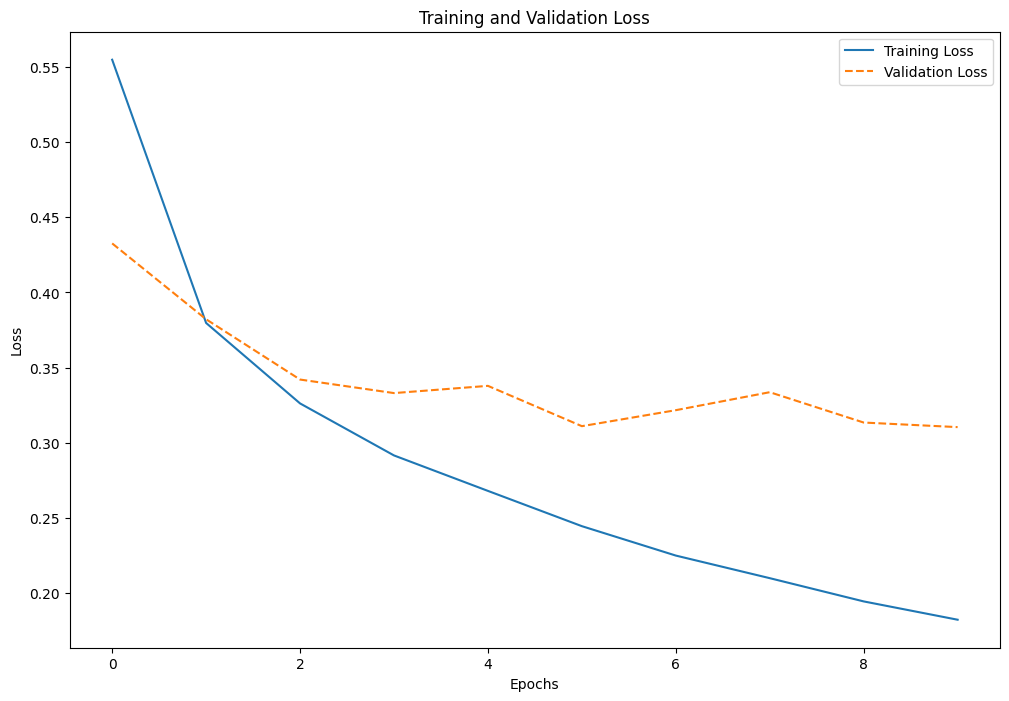

In [ ]:
# Plot Training & Validation Loss
plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

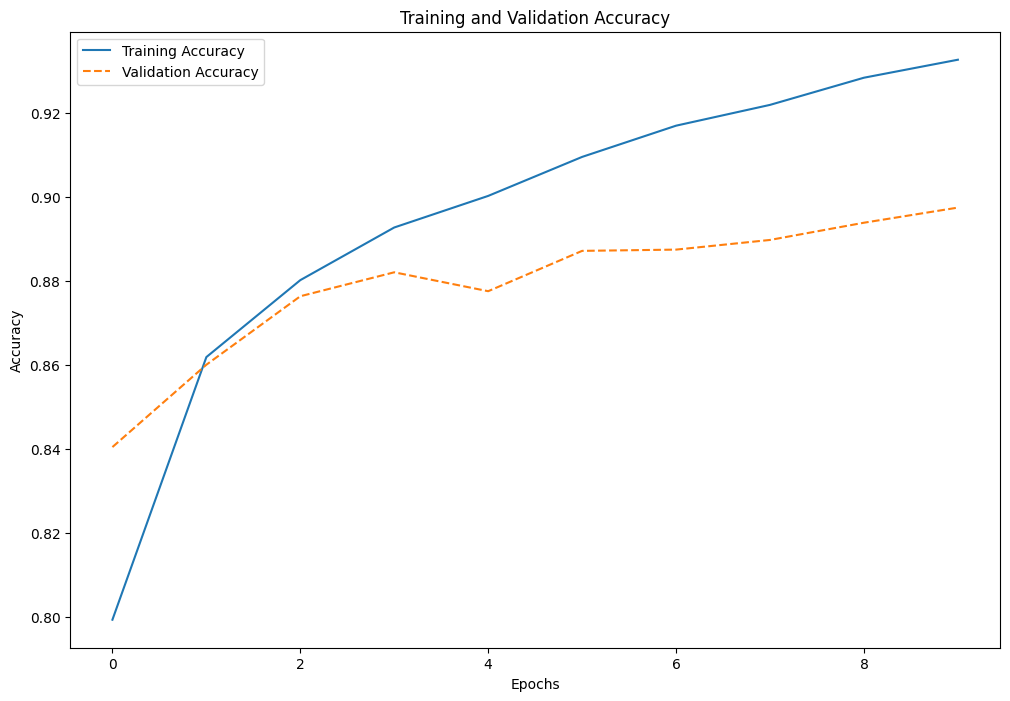

In [ ]:
# Plot Training & Validation Accuracy
plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# Predict and evaluate
y_prob = MNISTmodel.predict(x_test)
y_pred = y_prob.argmax(axis=1)
print("Model Accuracy on Test Set:", accuracy_score(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Model Accuracy on Test Set: 0.8975


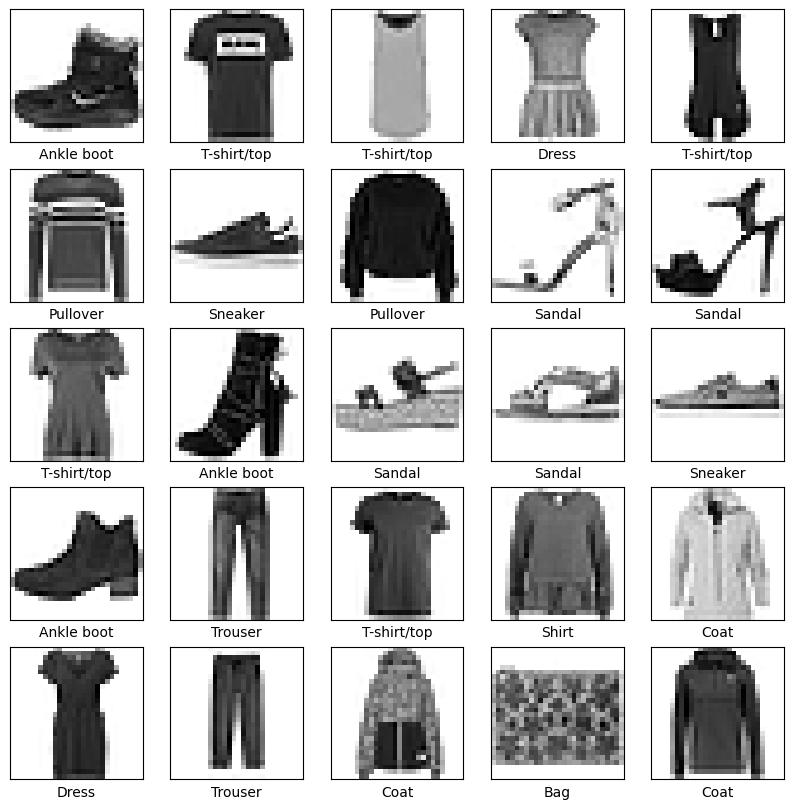

In [ ]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) # train_images is now defined
    plt.xlabel(class_names[train_labels[i]]) # train_labels is now defined
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Class: [8] [Bag]


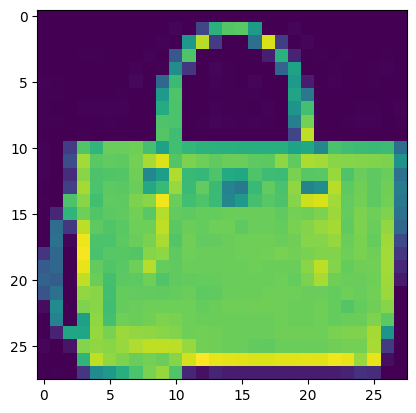

In [ ]:
# Fashion MNIST class labels
class_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

# Predict the class for the image at index 69
pred_class = MNISTmodel.predict(x_test[69].reshape(1, 28, 28, 1)).argmax(axis=1)[0]

# Display the image
plt.imshow(x_test[69])

# Print the predicted labels
print(f"Predicted Class: [{pred_class}] [{class_labels[pred_class]}]")
